

# Project: Investigate a Dataset - [No Show Medical Appointment Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **About Dataset**: The Dataset used in this Projects contains various Data associated with medical appointments. We would be analysing this data to have some bit of understanding as to why a person would book an hospital appointment, receives all the instructions and wouldn't not show up for his/her Medical appointment as well as the contributing factors to this. The Dataset contains the following fields:

- **PatientId**: Identification of a patient
- **Appointment ID**: Identification of each appointment
- **Gender**: Male or Female .Female is the greater proportion, woman takes way more care of they health in comparison to man
- **ScheduledDay**: Tells us on what day the patient set up their appointment.
- **AppointmentDay**: The day of appointment
- **Age**: Where the appointment takes place.
- **Neighborhood**: indicates the location of the hospital.
- **Scholarship**: True or False
- **Hipertension**: True or False
- **Diebetes**: True or False
- **Alcoholism**: True or False
- **Handicap**: True or False
- **SMS_recieved**: 1 or more messages sent to the patient
- **No show**: True or Falseit says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
> In This analysis we would be trying to answer the following questions:
- Is the No of Days between the scheduled day and appointment day Associated with Showing up for Appointment?
- Is the Timing of the Scheduled day Associated with Showing up for Appointment?
- Is Receiving Sms Associated with Showing up for Appointment?
- Is There any Association with Alcohol intake amongst Age Group and  Showing up for Appointment?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [3]:
from zipfile import ZipFile 
  
# specifying the name of the zip file
file = "archive.zip"
  
# open the zip file in read mode
with ZipFile(file, 'r') as zip: 
    # Extractfile
    zip.extractall() 

In [4]:
# Load Data and call up the first 5 rows
df = pd.read_csv('kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Summary Statistics of Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#To check the number of rows and columns
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#Check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [10]:
df.duplicated().value_counts()

False    110527
dtype: int64

- **There are 110527 records and 12 fields in the datasets.**
- **Further Data wrangling also reveals that there are 62,299 distinct persons. This means that there are  multiple appointments since the available records of data is 110527 rows.** 
- **There are no null values nor duplicates in this dataset.** 
- **The scheduled date and appointment day are formatted as strings**
- **There seems to be an issue with the Handcap column, there are 5 unique values and this doesn't tally with the data dictionary of the Datasets where we expect the column to be either True or false.This tally more with the SMS_received column**



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
df.columns= df.columns.str.lower()

In [12]:
# Covert the ScheduledDay and AppointmentDay to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday']= pd.to_datetime(df['appointmentday'])
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Renaming the Handcap column to sms_received and vice versa because it tallies with the Information on the Dataset
df = df.rename(columns ={'sms_received':'handicap'})
df = df.rename(columns ={'handcap':'sms_received'})

In [14]:
df = df.rename(columns ={'no-show':'no_show'})
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [15]:
df.no_show.replace(to_replace = ['No','Yes'],value =[0, 1], inplace = True)

- **For the Data Cleaning, All the column names were converted to lowercase.**
- **The ScheduledDay and AppointmentDay was converted to Datetime.**
- **The Handcap and sms_received column was swapped because the original handcap column contained 5 unique values which differs from what is expected but more in sync with what we expect for the sms_recievd column**. 
- **The column was renamed properly for easy references**
- **The dependent variable (No_show) fields was encoded.**

<a id='eda'></a>
## Exploratory Data Analysis

We have trimmed and cleaned  data, the next thing is to move on to exploration by **Computing statistics** and **create visualizations** with the goal of addressing the research questions posed in the Introduction section. 




    

In [16]:
df_explore = df.drop(['patientid','appointmentid'], axis = 1)

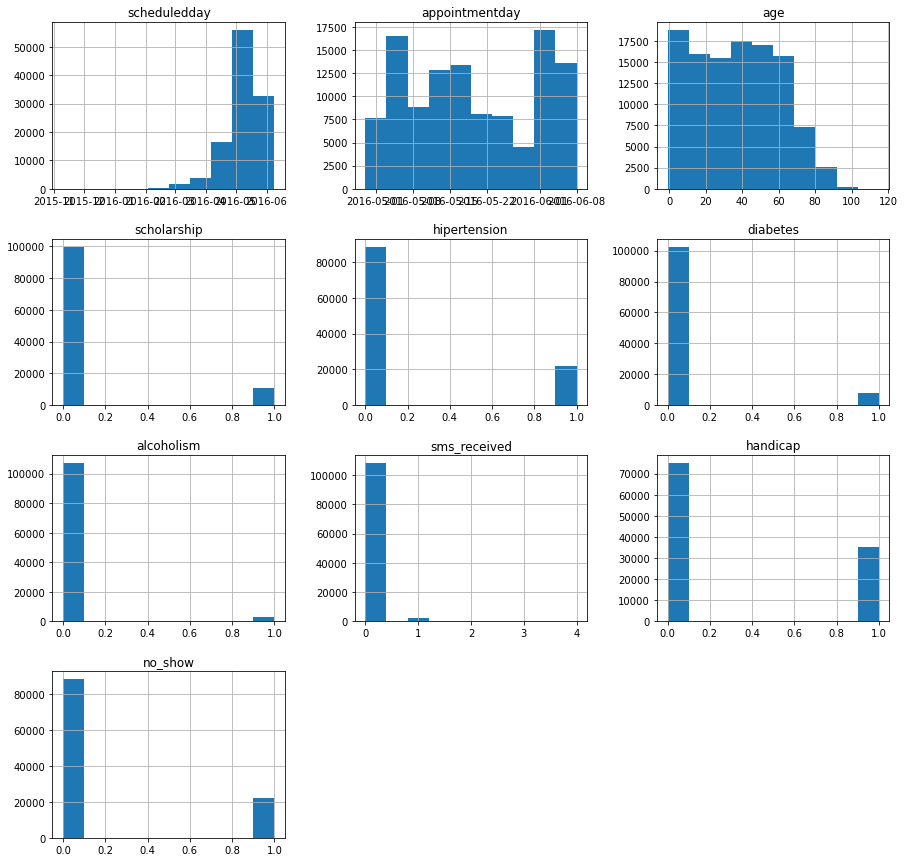

In [17]:
#Visualizing the Data  to yave an idea of the distribution
df_explore.hist(figsize = (15,15));

In [18]:
df_explore.describe()


,age,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [19]:
#drop invalid age columns
df.drop(df.query('age < 0').index, inplace = True)

In [20]:
df_explore.columns


Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'sms_received',
       'handicap', 'no_show'],
      dtype='object')

In [21]:
#Creating Masks for where the patients showed up and didn't (No_show column field is the dependent variable in this Dataset)
#show_up = df[df['No_show'] == 0]
#no_show = df[df['No_show'] == 1]

show_up = df.no_show == False
no_show =df.no_show == True

### Research Question 1 (Is the No of Days between the scheduled day and appointment day Associated with Showing up for Appointment?)

In [22]:
df['wait_days']= (df['appointmentday']- df['scheduledday']).dt.days

In [23]:
df['wait_days'].value_counts()

-1      38562
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: wait_days, Length: 131, dtype: int64

In [24]:
#drop all negative values because appointment day should be later than scheduled day
df.drop(df.query('wait_days < 0').index, inplace = True)

In [25]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show,wait_days
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,0.285190,14.642018
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,0.451508,16.494334
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


At this juncture, we would be categorizing the wait_days using the below categories:
- no_wait:  min - 25% of wait_days values (0 to 3)
- short_wait High: 25% - 50% of wait_days values (3 to 8)
- medium_wait: 50% - 75% of wait_days values (8 to 21)
- long_wait: 75% - max of wait_days value (21 to 178)

In [26]:
# Bin edges that will be used to "cut" the wait_days data into groups
bin_edges = [ 0, 3 , 8, 21, 178 ] # Fill in this list with five values you just found

In [27]:
# Labels for the four wait_days categories
bin_names = [ 'no_wait','short_wait','medium_wait','long_wait' ]

In [28]:
# Creates wait_days_categories column
df['wait_days_categories'] = pd.cut(df['wait_days'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show,wait_days,wait_days_categories
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,no_wait
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,no_wait
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1,no_wait


In [29]:
#Creating the plots  function to reduce repetition
def plot(ind_variable,d_variable):
    count = df.groupby(ind_variable).no_show.value_counts()
    total = df.groupby(ind_variable).no_show.count()
    proportions = count / total
    no_show_proportions = proportions[:,1]
    show_up_proportions = proportions[:,0]
    if d_variable == 'no_show':
        no_show_proportions.plot(kind='bar', title= f'{d_variable}'' Against ' f'{ind_variable}', alpha=.7);
        plt.xlabel(f'{d_variable}', fontsize=12)
        plt.ylabel(f'{ind_variable}', fontsize=12)
    elif d_variable == 'show_up':
        show_up_proportions.plot(kind='bar', title= f'{d_variable}'' Against ' f'{ind_variable}', alpha=.7);
        plt.xlabel(f'{d_variable}', fontsize=12)
        plt.ylabel(f'{ind_variable}', fontsize=12)
    else:
        prnt('Cannot plot graph')

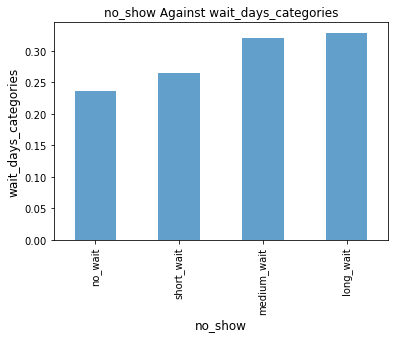

In [30]:
plot('wait_days_categories','no_show')

**The Above plots shows the Distribution of the Number of persons who did not show up for their appointment against the various categories of the number of waiting days between scheduled days and appointment day**

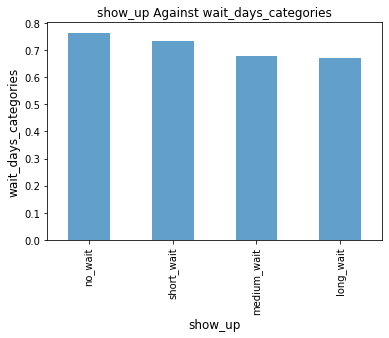

In [31]:
plot('wait_days_categories','show_up')

**From the Above plots, we can see that the proportions of people that had to wait longer days between the scheduled day and appointment days tend not to show up for their appointment. Looking at the No_show plot, we can see that the medium_wait and long_wait categories had the highest proportions and the lowest proportion in the show_up plots respectively. Hence we can infer that the more the waiting period the less likely people show up for their appointments.**

### Research Question 2 (Is the Timing of the Scheduled day Associated with Showing up for Appointment?)

In [32]:
#Creating a new column to get the hours of the day of the appointment
df['schedule_timing_hrs']= df['scheduledday'].dt.hour

In [33]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show,wait_days,schedule_timing_hrs
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,0.285190,14.642018,11.076794
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,0.451508,16.494334,3.276949
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.000000
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000,14.000000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000,21.000000


**we would be categorizing the scheduled timing hours using the below categories:**

- **morning**
- **afternoon**
- **Evening**
- **night**


In [34]:
# Bin edges that will be used to "cut" the wait_days data into groups
bin_edges = [ 6, 11, 16, 19, 21 ] 

In [35]:
# Labels for the 3 timing categories
bin_names = [ 'morning','afternoon','evening','night' ]

In [36]:
# Creates wait_days_categories column
df['Schedule_timing'] = pd.cut(df['schedule_timing_hrs'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show,wait_days,wait_days_categories,schedule_timing_hrs,Schedule_timing
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,no_wait,8,morning
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait,15,afternoon
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait,15,afternoon
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,no_wait,12,afternoon
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1,no_wait,14,afternoon


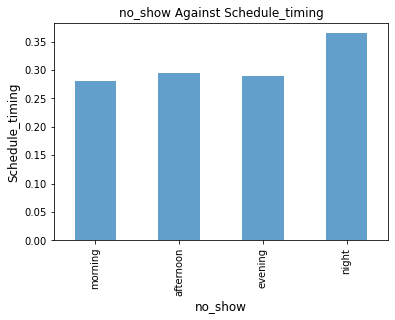

In [37]:
plot('Schedule_timing','no_show')

**The Above plots shows the Distribution of the Number of persons who did not show up for their appointment by the Timing of the day.**

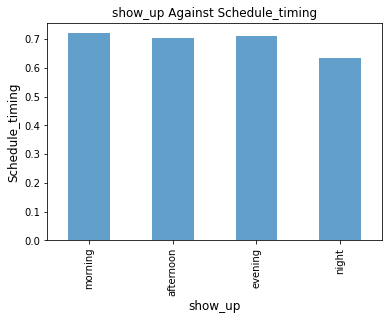

In [38]:
plot('Schedule_timing','show_up')

**Judging from the no show and show up plots we can infer that most people who are scheduled at night, tend not to show up the most. The people who were scheduled at night for the no show plot recorded the highest number and also the people scheduled at night for the show up plot had the lowest number**

### Research Question 3 (Is Receiving Sms Associated with Showing up for Appointment?)

In [39]:
df.sms_received[no_show].mean()

0.018273072799922036

In [40]:
df.sms_received[show_up].mean()

0.02072438128195657

In [41]:
df.sms_received[no_show].value_counts()

0    20188
1      297
2       34
3        2
4        1
Name: sms_received, dtype: int64

In [42]:
df.sms_received[show_up].value_counts()

0    50464
1      888
2       78
3        6
4        1
Name: sms_received, dtype: int64

In [43]:
df.sms_received[no_show].mean()

0.018273072799922036

In [44]:
df.sms_received[show_up].mean()

0.02072438128195657

**From the above analysis, the people who showed up received more sms than those who did not show up although the difference is little** 

### Research Question 4 (Is There any Association with Alcohol intake amongst Age Group and  Showing up for Appointment?)

Let's try categorising the Age column to see if there is any asopciation with  showing up for Appointments amongst age groups. The following Category would be used.

- children_teens
- youth
- adults
- elderly

In [45]:
df['age'].describe()

count    71959.000000
mean        38.502564
std         22.925421
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64

In [46]:
# Bin edges that will be used to "cut" the wait_days data into groups
bin_edges = [ 0, 19, 39, 57, 115 ] 

In [47]:
# Labels for the 3 timing categories
bin_names = [ 'children_teens','youth','adults','elderly' ]

In [48]:
# Creates age group categories column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,no_show,wait_days,wait_days_categories,schedule_timing_hrs,Schedule_timing,age_groups
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,no_wait,8,morning,elderly
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait,15,afternoon,youth
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,no_wait,15,afternoon,youth
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,no_wait,12,afternoon,children_teens
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1,no_wait,14,afternoon,youth


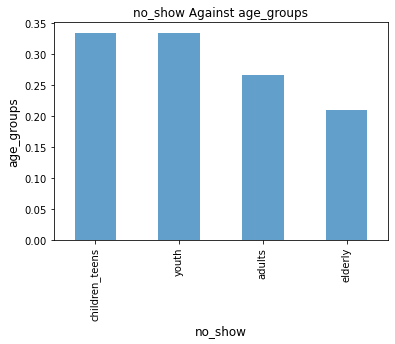

In [49]:
#plotting the bar chart to show the proportion of patients that did not show up by age groups
plot('age_groups','no_show')

**The Above plots shows the Distribution of the Number of persons who did not show up for their appointment by the Age Groups**

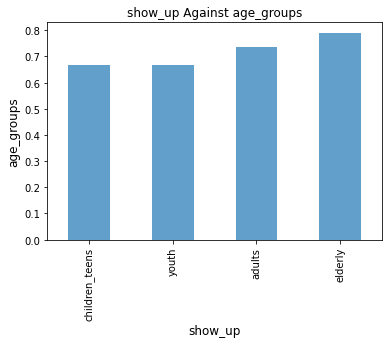

In [50]:
#plotting the bar chart to show the proportion of patients that showed up for appointment by age groups
plot('age_groups','show_up')

**The Above plots shows the Distribution of the Number of persons who showed up for their appointment by the Age Groups**

In [51]:
#Total counts by age group and alcoholism categories
df.groupby(['age_groups','alcoholism']).no_show.value_counts()


age_groups      alcoholism  no_show
children_teens  0           0          10557
                            1           5292
                1           0              9
                            1              6
youth           0           0          12313
                            1           6092
                1           0            213
                            1            171
adults          0           0          12788
                            1           4502
                1           0            592
                            1            323
elderly         0           0          13035
                            1           3427
                1           0            387
                            1            121
Name: no_show, dtype: int64

In [52]:
df.groupby(['age_groups', 'alcoholism']).no_show.mean()

age_groups      alcoholism
children_teens  0             0.333901
                1             0.400000
youth           0             0.330997
                1             0.445312
adults          0             0.260382
                1             0.353005
elderly         0             0.208176
                1             0.238189
Name: no_show, dtype: float64

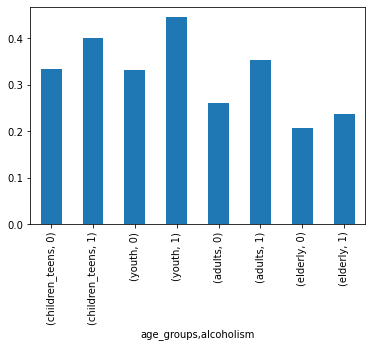

In [53]:
#Plotting the mean value of the no show column against the age_Group and alcoholism values
df.groupby(['age_groups', 'alcoholism']).no_show.mean().plot(kind='bar');

- **The first plot reveals that older people (Above 57 Years) tend to show up more for their appointments compare to younger ages**
- **The second plot reveals that those who take alcohol especially the youth with a mean value of about 0.45 tend not to show up for their appointment ( Remember than a value of 1 for the no_show column indicates the patients did not show up).**
- **The top 3 highest values are the youth who take alcohol, Children/teenagers who take alcohol and adults who take in alcohol respectively.**
- **This analysis implies that alcohol intake are rampant with youths and teenagers and this has a ripple effect that results in  missing a medical appointment.**

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

<a id='conclusions'></a>
## Conclusions

> From the various analysis done on this Dataset, below are the summary of the Findings
- Patients whose appointment day wasn't too far from the day the registration was made tend to show up for their appointment
- An Appointment at Night tend to be missed compared to the Morning, Afternoon and Evening
- Patients who receive an SMS of their appointment day tend to show up for Appointment
- Older Age groups tend to show up for their appointment compared to younger ages.
- People who take iN Alcohol tend to generally miss their appointments especially the youths that fall in the Age bracket of (19-39 years)

> **Limitation**:
There were instances during the Data Analysis where the appointment day was ealier than the scheduled day. This shouldn't be the case as the scheduled day speaks to the day the patient set up their appointment  Hence. should be earlier.

